In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import seaborn as sns
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [12]:
sales = pd.read_csv("sales.csv")
comp_prices = pd.read_csv("comp_prices.csv")
sales.DATE_ORDER=sales.DATE_ORDER.apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))
# sales por produto 
sale = {}
sale_per_price = {}
for i in range(1,10):
    sale[i] = sales[sales['PROD_ID'] == 'P'+str(i)]
    # criar coluna preço por produto vendido
    sale[i]['Price_per_produto'] = (sale[i]['REVENUE'])/(sale[i]['QTY_ORDER'])
    # quantidade de produtos vendidos por preço 
    sale_per_price[i] = sale[i].groupby(['Price_per_produto'])['QTY_ORDER'].sum()
    sale_per_price[i] = sale_per_price[i].reset_index().sort_values(by='QTY_ORDER', ascending=False)

In [13]:
#statisticas
for i in range(1,10):
    print('Produto' + str(i))
    print(sale_per_price[i].describe())

Produto1
       Price_per_produto    QTY_ORDER
count          44.000000    44.000000
mean         1318.036364    94.840909
std            86.637168   354.164522
min          1145.780000     1.000000
25%          1254.975000     1.000000
50%          1303.325000     2.000000
75%          1370.087500    17.000000
max          1499.000000  2184.000000
Produto2
       Price_per_produto     QTY_ORDER
count         559.000000    559.000000
mean          694.766530    121.366726
std            77.392655    885.436055
min           494.100000      1.000000
25%           659.815000      2.000000
50%           691.530000      7.000000
75%           737.990000     32.000000
max           929.000000  12239.000000
Produto3
       Price_per_produto   QTY_ORDER
count         215.000000  215.000000
mean         1292.560791   13.716279
std            97.371650   45.021059
min          1008.830000    1.000000
25%          1244.950000    1.000000
50%          1309.220000    3.000000
75%          1368.065

In [176]:
# CLUSTERING PARA CADA PRODUTO UTILIZANDO KMEANS, E O METODO DE ELBOW PARA DEFINIR O VALOR IDEAL DE CLUSTERES

In [177]:
#PRODUTO 1

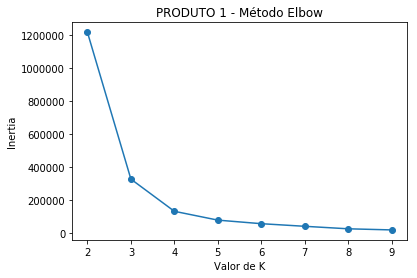

Text(0, 0.5, 'QTY_ORDER')

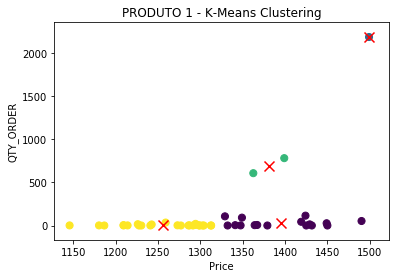

In [5]:
###### ELBOW METHOD
Ks = range(2, 10)
Ds = []
for K in Ks:
    cls = KMeans(n_clusters = K, random_state = 101)
    cls.fit(sale_per_price[1])
    Ds.append(cls.inertia_)
plt.plot(Ks, Ds, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.title('PRODUTO 1 - Método Elbow')
plt.show()
# VEMOS QUE O MELHOR VALOR PARA O NUMERO DE CLUSTERES PARA O PRODUTO 1 É 4
###### K MEANS
kmeans = KMeans(n_clusters = 4).fit(sale_per_price[1])
kmeans.cluster_centers_
clust_labels = kmeans.fit_predict(sale_per_price[1])
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(sale_per_price[1].Price_per_produto,sale_per_price[1].QTY_ORDER,c=clust_labels,s=50)
scatter = ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = 'x', color = 'r', s=100, linewidths=1)
ax.set_title('PRODUTO 1 - K-Means Clustering')
ax.set_xlabel('Price')
ax.set_ylabel('QTY_ORDER')


Text(0.5, 1.0, 'Frequências dos preços')

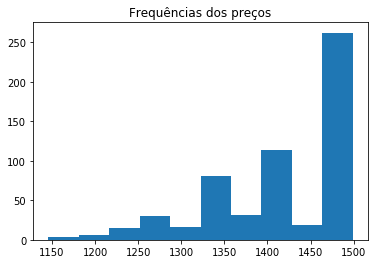

In [357]:
# ANALISANDO O FATOR TEMPO OBSERVAMOS QUE A FREQUÊNCIA DE DETERMINADO PREÇO INFLUENCIA NA QTD VENDIDA 
price_in_time = (sale[1])[['DATE_ORDER','Price_per_produto']]
price_in_time_no_duplicate = price_in_time.drop_duplicates()
plt.hist(price_in_time_no_duplicate.Price_per_produto)
plt.title('Frequências dos preços')

In [358]:
#PRODUTO 2

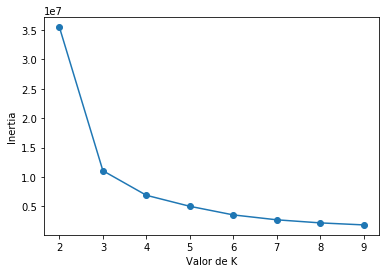

Text(0, 0.5, 'QTY_ORDER')

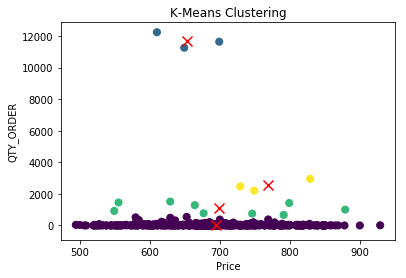

In [359]:
#ELBOW METHOD
Ks = range(2, 10)
Ds = []
for K in Ks:
    cls = KMeans(n_clusters = K, random_state = 101)
    cls.fit(sale_per_price[2])
    Ds.append(cls.inertia_)
plt.plot(Ks, Ds, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.show()
# VEMOS QUE O MELHOR VALOR PARA O NUMERO DE CLUSTERES PARA O PRODUTO 2 É 4
kmeans = KMeans(n_clusters = 4).fit(sale_per_price[2])
kmeans.cluster_centers_
clust_labels = kmeans.fit_predict(sale_per_price[2])
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(sale_per_price[2].Price_per_produto,sale_per_price[2].QTY_ORDER,c=clust_labels,s=50)
scatter = ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = 'x', color = 'r', s=100, linewidths=1)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Price')
ax.set_ylabel('QTY_ORDER')


(array([ 48.,  76., 131., 234., 492., 407., 239., 259.,  80.,  11.]),
 array([494.1 , 537.59, 581.08, 624.57, 668.06, 711.55, 755.04, 798.53,
        842.02, 885.51, 929.  ]),
 <a list of 10 Patch objects>)

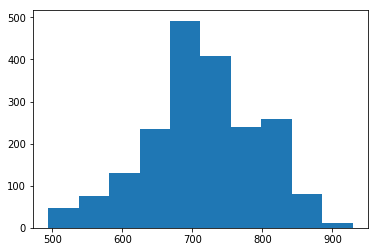

In [360]:
# ANALISANDO O FATOR TEMPO OBSERVAMOS QUE A FREQUÊNCIA DE DETERMINADO PREÇO INFLUENCIA NA QTD VENDIDA 
price_in_time = (sale[2])[['DATE_ORDER','Price_per_produto']]
price_in_time_no_duplicate = price_in_time.drop_duplicates()
plt.hist(price_in_time_no_duplicate.Price_per_produto)

In [361]:
#PRODUTO 3

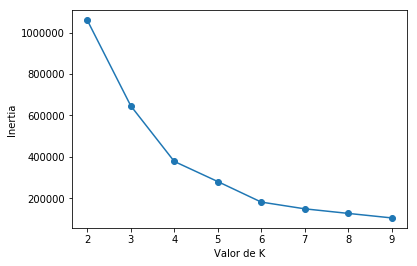

Text(0, 0.5, 'QTY_ORDER')

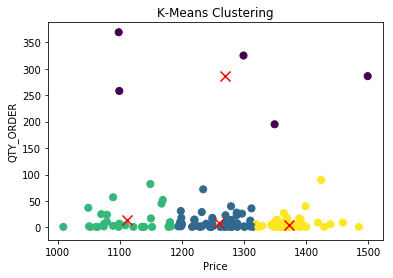

In [362]:
#ELBOW METHOD
Ks = range(2, 10)
Ds = []
for K in Ks:
    cls = KMeans(n_clusters = K, random_state = 101)
    cls.fit(sale_per_price[3])
    Ds.append(cls.inertia_)
plt.plot(Ks, Ds, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.show()
# VEMOS QUE O MELHOR VALOR PARA O NUMERO DE CLUSTERES PARA O PRODUTO 3 É 4
kmeans = KMeans(n_clusters = 4).fit(sale_per_price[3])
kmeans.cluster_centers_
clust_labels = kmeans.fit_predict(sale_per_price[3])
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(sale_per_price[3].Price_per_produto,sale_per_price[3].QTY_ORDER,c=clust_labels,s=50)
scatter = ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = 'x', color = 'r', s=100, linewidths=1)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Price')
ax.set_ylabel('QTY_ORDER')

(array([  5.,  56.,  25.,  69.,  59., 150.,  56., 132.,  18.,  76.]),
 array([1008.83 , 1057.847, 1106.864, 1155.881, 1204.898, 1253.915,
        1302.932, 1351.949, 1400.966, 1449.983, 1499.   ]),
 <a list of 10 Patch objects>)

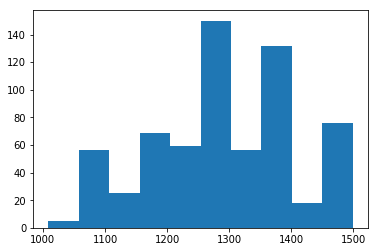

In [363]:
# ANALISANDO O FATOR TEMPO OBSERVAMOS QUE A FREQUÊNCIA DE DETERMINADO PREÇO INFLUENCIA NA QTD VENDIDA 
# ESSE PRODUTO TEVE BOAS VENDAS COM OFERTAS DE MENOR FREQUÊNCIA, O VALOR DE 1098 FOI ONDE TEVE O PICO DE VENDAS
# DANDO 369 VENDAS, PORÉM VEMOS PELO HISTOGRAMA QUE ESSE VALOR DE 1098 NÃO FOI O QUE FICOU ENTRE OS MAIS 
# FREQUENTES
price_in_time = (sale[3])[['DATE_ORDER','Price_per_produto']]
price_in_time_no_duplicate = price_in_time.drop_duplicates()
plt.hist(price_in_time_no_duplicate.Price_per_produto)

In [69]:
# PRODUTO 4

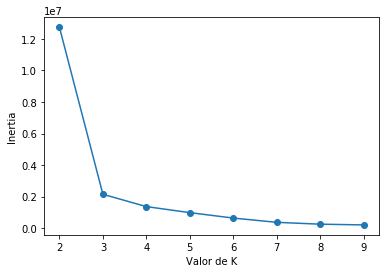

Text(0, 0.5, 'QTY_ORDER')

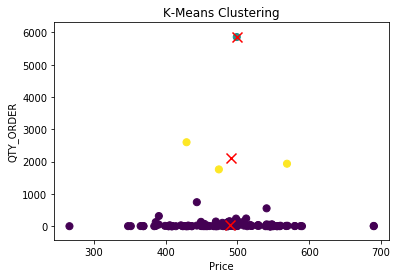

In [364]:
#ELBOW METHOD
Ks = range(2, 10)
Ds = []
for K in Ks:
    cls = KMeans(n_clusters = K, random_state = 101)
    cls.fit(sale_per_price[4])
    Ds.append(cls.inertia_)
plt.plot(Ks, Ds, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.show()
# VEMOS QUE O MELHOR VALOR PARA O NUMERO DE CLUSTERES PARA O PRODUTO 4 É 3
kmeans = KMeans(n_clusters = 3).fit(sale_per_price[4])
kmeans.cluster_centers_
clust_labels = kmeans.fit_predict(sale_per_price[4])
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(sale_per_price[4].Price_per_produto,sale_per_price[4].QTY_ORDER,c=clust_labels,s=50)
scatter = ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = 'x', color = 'r', s=100, linewidths=1)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Price')
ax.set_ylabel('QTY_ORDER')

(array([  1.,   2.,  16.,  43., 140., 257., 151., 104.,   0.,  10.]),
 array([265.81 , 308.228, 350.646, 393.064, 435.482, 477.9  , 520.318,
        562.736, 605.154, 647.572, 689.99 ]),
 <a list of 10 Patch objects>)

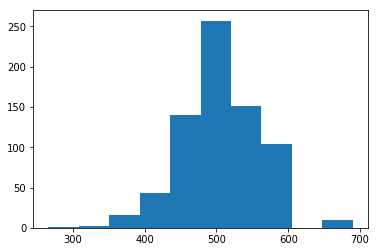

In [365]:
# ANALISANDO O FATOR TEMPO OBSERVAMOS QUE A FREQUÊNCIA DE DETERMINADO PREÇO INFLUENCIA NA QTD VENDIDA 
price_in_time = (sale[4])[['DATE_ORDER','Price_per_produto']]
price_in_time_no_duplicate = price_in_time.drop_duplicates()
plt.hist(price_in_time_no_duplicate.Price_per_produto)

In [77]:
# PRODUTO 5

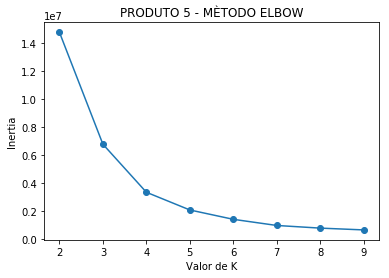

Text(0, 0.5, 'QTY_ORDER')

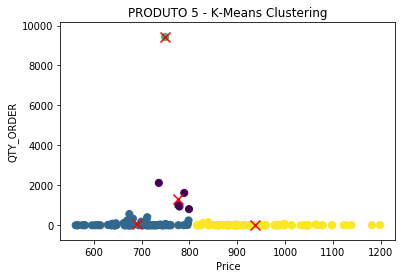

In [366]:
#ELBOW METHOD
Ks = range(2, 10)
Ds = []
for K in Ks:
    cls = KMeans(n_clusters = K, random_state = 101)
    cls.fit(sale_per_price[5])
    Ds.append(cls.inertia_)
plt.plot(Ks, Ds, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.title('PRODUTO 5 - MÈTODO ELBOW')
plt.show()
# VEMOS QUE O MELHOR VALOR PARA O NUMERO DE CLUSTERES PARA O PRODUTO 5 É 4
kmeans = KMeans(n_clusters = 4).fit(sale_per_price[5])
kmeans.cluster_centers_
clust_labels = kmeans.fit_predict(sale_per_price[5])
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(sale_per_price[5].Price_per_produto,sale_per_price[5].QTY_ORDER,c=clust_labels,s=50)
scatter = ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = 'x', color = 'r', s=100, linewidths=1)
ax.set_title('PRODUTO 5 - K-Means Clustering')
ax.set_xlabel('Price')
ax.set_ylabel('QTY_ORDER')

Text(0.5, 1.0, 'Frequência dos preços')

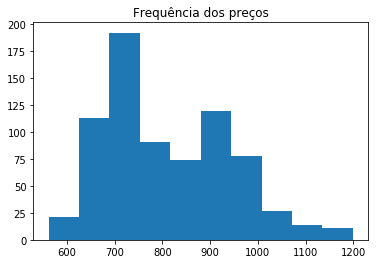

In [367]:
# ANALISANDO O FATOR TEMPO OBSERVAMOS QUE ESSE PRODUTO NÃO RESPEITA O MESMO PADRÃO DE OUTROS PRODUTOS
# EM MUITOS CASOS, OS PREÇOS SE MATIVERAM POR MUITOS DIAS E MESMO ASSIM ISSO NÃO INFLUENCIOU NA QTD DE VENDAS 
price_in_time = (sale[5])[['DATE_ORDER','Price_per_produto']]
price_in_time_no_duplicate = price_in_time.drop_duplicates()
plt.hist(price_in_time_no_duplicate.Price_per_produto)
plt.title('Frequência dos preços')

In [368]:
# PRODUTO 6

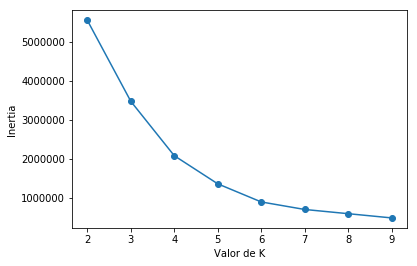

array([[1743.21866667,    7.76444444],
       [1471.59589041,    9.16438356],
       [1880.5605042 ,    4.14285714],
       [2348.33571429,   12.28571429],
       [1532.28      ,  621.        ]])

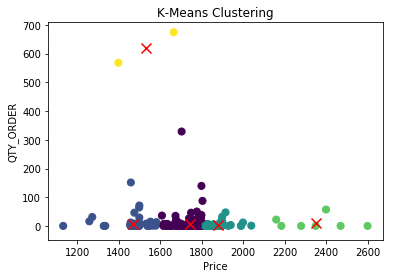

In [369]:
#ELBOW METHOD
Ks = range(2, 10)
Ds = []
for K in Ks:
    cls = KMeans(n_clusters = K, random_state = 101)
    cls.fit(sale_per_price[6])
    Ds.append(cls.inertia_)
plt.plot(Ks, Ds, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.show()
# VEMOS QUE O MELHOR VALOR PARA O NUMERO DE CLUSTERES PARA O PRODUTO 6 É 5
kmeans = KMeans(n_clusters = 5).fit(sale_per_price[6])
kmeans.cluster_centers_
clust_labels = kmeans.fit_predict(sale_per_price[6])
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(sale_per_price[6].Price_per_produto,sale_per_price[6].QTY_ORDER,c=clust_labels,s=50)
scatter = ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = 'x', color = 'r', s=100, linewidths=1)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Price')
ax.set_ylabel('QTY_ORDER')
kmeans.cluster_centers_


(array([  5.,   4., 130., 133., 331., 142.,   9.,   2.,  25.,   2.]),
 array([1133.19 , 1279.771, 1426.352, 1572.933, 1719.514, 1866.095,
        2012.676, 2159.257, 2305.838, 2452.419, 2599.   ]),
 <a list of 10 Patch objects>)

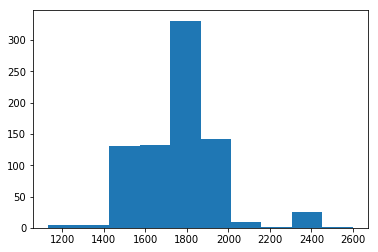

In [370]:
# ANALISANDO O FATOR TEMPO OBSERVAMOS QUE A FREQUÊNCIA DE DETERMINADO PREÇO INFLUENCIA DIRETAMENTE NA QTD VENDIDA 
price_in_time = (sale[6])[['DATE_ORDER','Price_per_produto']]
price_in_time_no_duplicate = price_in_time.drop_duplicates()
plt.hist(price_in_time_no_duplicate.Price_per_produto)

In [371]:
# PRODUTO 7

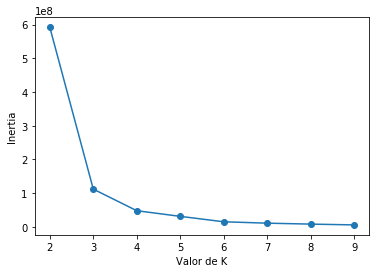

Text(0, 0.5, 'QTY_ORDER')

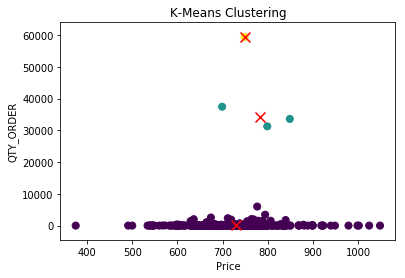

In [372]:
#ELBOW METHOD
Ks = range(2, 10)
Ds = []
for K in Ks:
    cls = KMeans(n_clusters = K, random_state = 101)
    cls.fit(sale_per_price[7])
    Ds.append(cls.inertia_)
plt.plot(Ks, Ds, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.show()
# VEMOS QUE O MELHOR VALOR PARA O NUMERO DE CLUSTERES PARA O PRODUTO 7 É 3
kmeans = KMeans(n_clusters = 3).fit(sale_per_price[7])
kmeans.cluster_centers_
clust_labels = kmeans.fit_predict(sale_per_price[7])
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(sale_per_price[7].Price_per_produto,sale_per_price[7].QTY_ORDER,c=clust_labels,s=50)
scatter = ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = 'x', color = 'r', s=100, linewidths=1)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Price')
ax.set_ylabel('QTY_ORDER')

(array([1.000e+00, 2.000e+00, 3.600e+01, 1.840e+02, 5.640e+02, 1.004e+03,
        4.450e+02, 2.140e+02, 2.500e+01, 1.600e+01]),
 array([ 374.5 ,  441.95,  509.4 ,  576.85,  644.3 ,  711.75,  779.2 ,
         846.65,  914.1 ,  981.55, 1049.  ]),
 <a list of 10 Patch objects>)

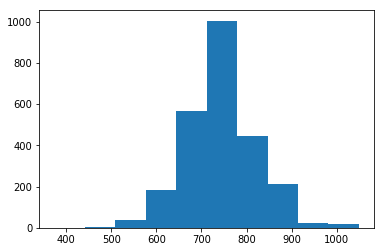

In [373]:
# ANALISANDO O FATOR TEMPO OBSERVAMOS QUE A FREQUÊNCIA DE DETERMINADO PREÇO INFLUENCIA NA QTD VENDIDA 
price_in_time = (sale[7])[['DATE_ORDER','Price_per_produto']]
price_in_time_no_duplicate = price_in_time.drop_duplicates()
plt.hist(price_in_time_no_duplicate.Price_per_produto)

In [374]:
# PRODUTO 8

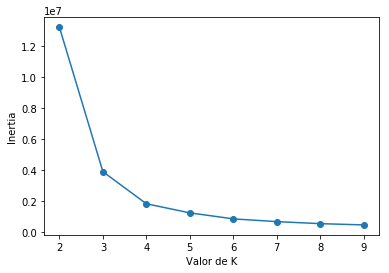

Text(0, 0.5, 'QTY_ORDER')

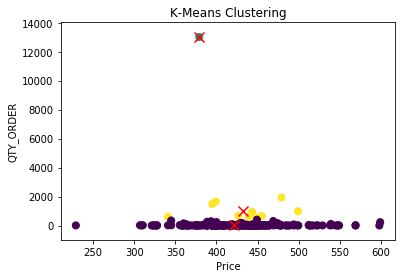

In [375]:
#ELBOW METHOD
Ks = range(2, 10)
Ds = []
for K in Ks:
    cls = KMeans(n_clusters = K, random_state = 101)
    cls.fit(sale_per_price[8])
    Ds.append(cls.inertia_)
plt.plot(Ks, Ds, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.show()
# VEMOS QUE O MELHOR VALOR PARA O NUMERO DE CLUSTERES PARA O PRODUTO 8 É 4
kmeans = KMeans(n_clusters = 3).fit(sale_per_price[8])
kmeans.cluster_centers_
clust_labels = kmeans.fit_predict(sale_per_price[8])
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(sale_per_price[8].Price_per_produto,sale_per_price[8].QTY_ORDER,c=clust_labels,s=50)
scatter = ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = 'x', color = 'r', s=100, linewidths=1)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Price')
ax.set_ylabel('QTY_ORDER')

(array([  1.,   0.,  18., 104., 234., 358., 179., 111.,  33.,  68.]),
 array([229., 266., 303., 340., 377., 414., 451., 488., 525., 562., 599.]),
 <a list of 10 Patch objects>)

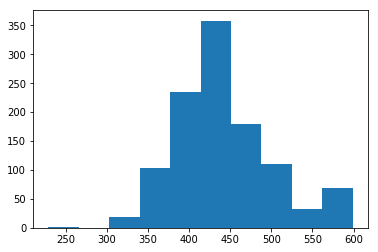

In [376]:
# NESTE PRODUTO VEMOS QUE A FREQUENCIA DE DETERMINADO VALOR POUCO INFLUENCIA NA QTD VENDIDA
price_in_time = (sale[8])[['DATE_ORDER','Price_per_produto']]
price_in_time_no_duplicate = price_in_time.drop_duplicates()
plt.hist(price_in_time_no_duplicate.Price_per_produto)

In [377]:
# PRODUTO 9

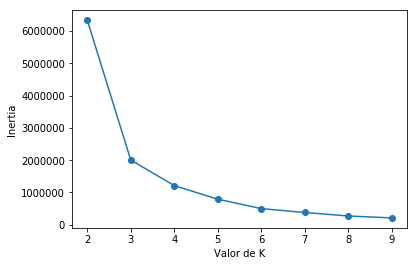

Text(0, 0.5, 'QTY_ORDER')

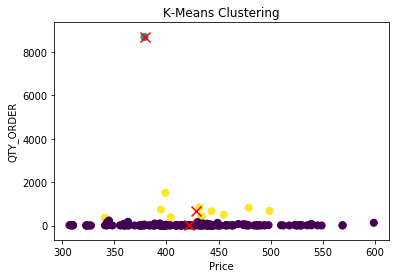

In [378]:
#ELBOW METHOD
Ks = range(2, 10)
Ds = []
for K in Ks:
    cls = KMeans(n_clusters = K, random_state = 101)
    cls.fit(sale_per_price[9])
    Ds.append(cls.inertia_)
plt.plot(Ks, Ds, 'o-')
plt.xlabel("Valor de K")
plt.ylabel("Inertia")
plt.show()
# VEMOS QUE O MELHOR VALOR PARA O NUMERO DE CLUSTERES PARA O PRODUTO 9 É 3
kmeans = KMeans(n_clusters = 3).fit(sale_per_price[9])
kmeans.cluster_centers_
clust_labels = kmeans.fit_predict(sale_per_price[9])
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(sale_per_price[9].Price_per_produto,sale_per_price[9].QTY_ORDER,c=clust_labels,s=50)
scatter = ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker = 'x', color = 'r', s=100, linewidths=1)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Price')
ax.set_ylabel('QTY_ORDER')

(array([ 21.,  82.,  79., 132., 220., 106.,  94.,  54.,  15.,  41.]),
 array([306.99 , 336.191, 365.392, 394.593, 423.794, 452.995, 482.196,
        511.397, 540.598, 569.799, 599.   ]),
 <a list of 10 Patch objects>)

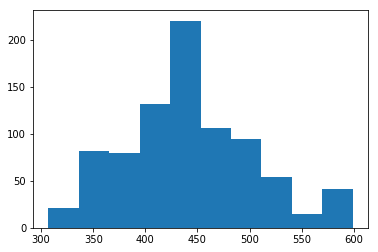

In [379]:
# NESSE CASO TAMBÉM VEMOS QUE NÃO HÁ RELAÇÃO NO PICO DE VENDAS COM QUANTIDADE DE OCORRÊNCIAS DO PREÇO NESSE PICO
# VEMOS QUE A FREQUÊNCIA INFLUENCIA VALORES MAIS BAIXOS NO GRÁFICO, PORÉM O PICO DE VENDA PODE TER SIDO OCASIONADO 
# POR UMA BOA OFERTA QUE FOI FEITA EM RELAÇÃO A OUTROS CONCORRENTES
price_in_time = (sale[9])[['DATE_ORDER','Price_per_produto']]
price_in_time_no_duplicate = price_in_time.drop_duplicates()
plt.hist(price_in_time_no_duplicate.Price_per_produto)

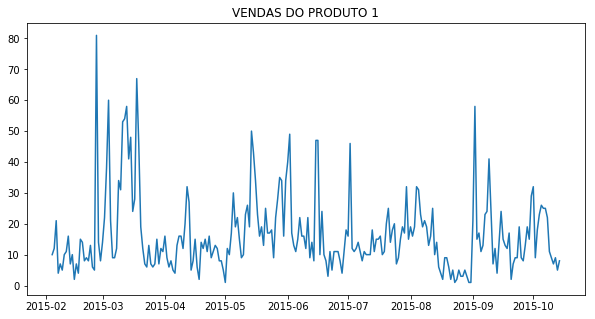

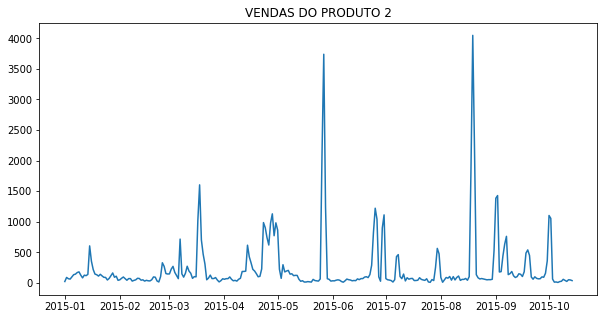

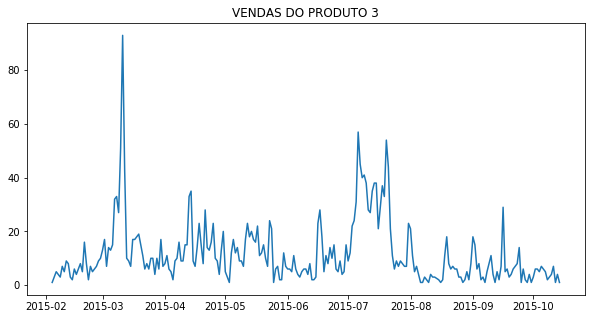

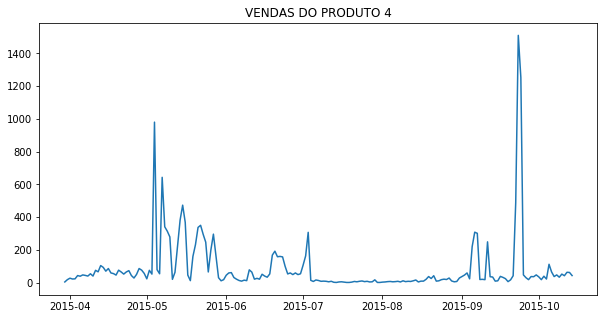

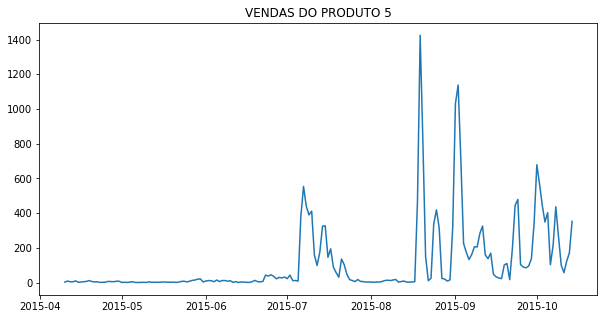

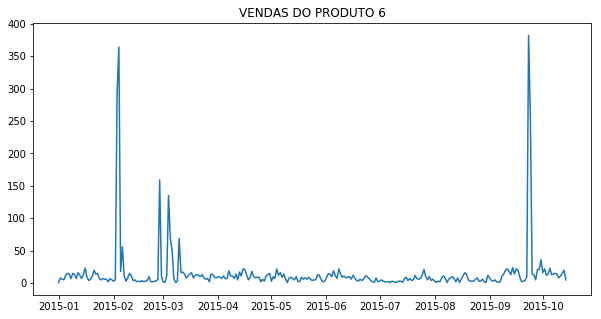

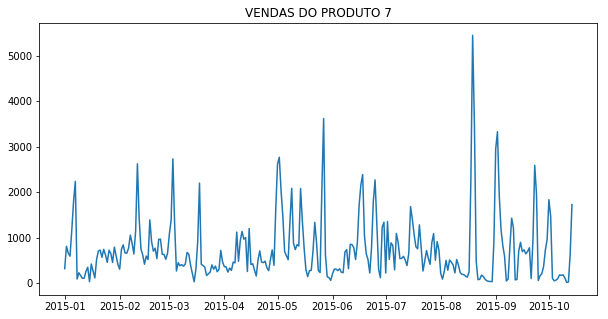

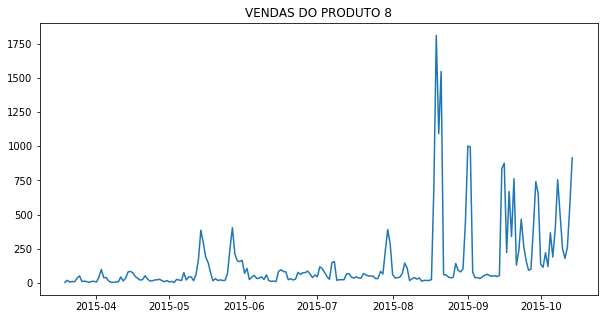

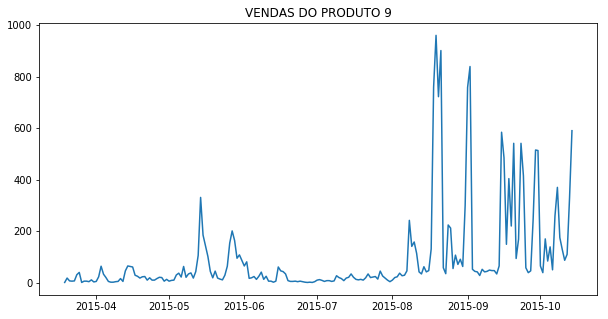

In [267]:
# ANALISE DE VENDAS DA LOJA PELO TEMPO
sale_by_date = {}
for i in range(1,10):
    sale_by_date[i] = sale[i].groupby(['DATE_ORDER'])['QTY_ORDER'].sum()
    plt.figure(figsize=(10,5))
    plt.title('VENDAS DO PRODUTO ' + str(i))
    plt.plot(sale_by_date[i])

In [137]:
# ANALISANDO O PREÇO DOS PRODUTOS EM RELAÇÃO A CADA COMPETIDOR 

In [14]:
prices_por_competitor = {}
prices_por_product_por_competitor = {}
for i in range(1,7):
    products = {}
    for j in range(1,10):
        prices_por_competitor[i] = comp_prices[comp_prices['COMPETITOR']=='C'+str(i)]
        products[j]= prices_por_competitor[i][prices_por_competitor[i]['PROD_ID'] ==  'P'+str(j)]
    prices_por_product_por_competitor.setdefault(i, []).append(products)

In [15]:
# VARIAÇÃO DE PREÇOS PARA OS PRODUTOS E AS MÉDIAS DIÁRIAS 
price_in_time = {}
price_in_time_no_duplicate = {}
price_in_time_DATE_INDEX = {}
price_in_time_DATE_INDEX_MEDIAN = {}

for i in range(1,10):
    price_in_time[i] = (sale[i])[['DATE_ORDER','Price_per_produto']]
    price_in_time_no_duplicate[i] = price_in_time[i].drop_duplicates()    
    price_in_time_DATE_INDEX[i] = price_in_time_no_duplicate[i]
    price_in_time_DATE_INDEX[i] = price_in_time_DATE_INDEX[i].sort_values(by='DATE_ORDER')
    price_in_time_DATE_INDEX[i].set_index('DATE_ORDER', inplace=True)
    price_in_time_DATE_INDEX_MEDIAN[i] = price_in_time_DATE_INDEX[i].groupby('DATE_ORDER')[['Price_per_produto']].median()
    #plt.figure(figsize=(10,5))
    #plt.title('Produto' + str(i))
    #plt.plot(price_in_time_DATE_INDEX_MEDIAN[i], 'o')


In [16]:
# MONTAMOS UMA TABELA COM A QTD VENDIDA EM DETERMINADO PREÇO E A QUANTIDADE DE OCORRÊNCIAS QUE FOI VENDIDO POR ESSE PREÇO
price_frequence = {}
price_frequence_qty = {}
for i in range(1,10):
    price_frequence[i] = (sale[i])[['DATE_ORDER', 'Price_per_produto']]
    (price_frequence[i])['Ocurr']= (price_frequence[i]).groupby(['Price_per_produto'])['DATE_ORDER'].transform('count')
    price_frequence[i] = price_frequence[i].drop('DATE_ORDER',axis=1)
    price_frequence[i]=price_frequence[i].drop_duplicates()
    price_frequence_qty[i] = pd.merge(price_frequence[i],sale_per_price[i],on=['Price_per_produto'])
    price_frequence_qty[i] = price_frequence_qty[i].sort_values(by='Price_per_produto',ascending=False)


In [17]:
# COMO VIMOS, A QUANTIDADE DE PRODUTOS VENDIDOS SERÁ DENTRE OUTROS FATORES EXTERNOS, MUITAS VEZES UMA 
# FUNÇÃO DE PREÇO E FREQUÊNCIA QUE ESSE DETERMINADO PREÇO SE MANTEVE
# UTILIZAREMOS RANDOM FOREST REGRESSION PARA PREVER A QUANTIDADE VENDIDA, DADO UM CERTO PREÇO E A SUA FREQUENCIA
x = {}
y = {}
x_train = {}
x_test = {}
y_train = {}
y_test = {}
model = {}
model_regression = {}
previsoes = {}
for i in range(1,10):
    x[i] = (price_frequence_qty[i])[['Price_per_produto','Ocurr']]
    x[i] = np.array(x[i])
    y[i] = (price_frequence_qty[i])[['QTY_ORDER']]
    y[i] = np.array(y[i])
    x_train[i],x_test[i],y_train[i],y_test[i] = train_test_split(x[i],y[i], test_size = 0.33, random_state=101)
    model[i] = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state=101)
    model_regression[i] = model[i].fit(x_train[i],y_train[i].ravel())
    previsoes[i] = model_regression[i].predict(x_test[i])

In [18]:
# AVALIAÇÂO DOS MODELOS DE PREVISÂO PARA CADA PRODUTO
for i in range(1,10):
    print('Produto ', str(i))
    for j in range(len(previsoes[i])):
        print('Quantidade Prevista:',(previsoes[i])[j], '-- ' 'Quantidade Observada:', (int((y_test[i])[j])))
    print('---------------------------------------------------------------------------')

Produto  1
Quantidade Prevista: 183.79460693388756 -- Quantidade Observada: 53
Quantidade Prevista: 111.90609357469779 -- Quantidade Observada: 1
Quantidade Prevista: 116.10680786041208 -- Quantidade Observada: 35
Quantidade Prevista: 169.38598395392637 -- Quantidade Observada: 92
Quantidade Prevista: 111.90609357469779 -- Quantidade Observada: 5
Quantidade Prevista: 117.83447452707873 -- Quantidade Observada: 1
Quantidade Prevista: 162.4696332213256 -- Quantidade Observada: 5
Quantidade Prevista: 138.13766225601643 -- Quantidade Observada: 107
Quantidade Prevista: 183.79460693388756 -- Quantidade Observada: 27
Quantidade Prevista: 111.90609357469779 -- Quantidade Observada: 1
Quantidade Prevista: 124.74394568092492 -- Quantidade Observada: 1
Quantidade Prevista: 111.90609357469779 -- Quantidade Observada: 1
Quantidade Prevista: 111.90609357469779 -- Quantidade Observada: 20
Quantidade Prevista: 116.10680786041208 -- Quantidade Observada: 16
Quantidade Prevista: 116.10680786041208 -- Q

Quantidade Prevista: 3.0240180155067624 -- Quantidade Observada: 2
Quantidade Prevista: 4.502334997298384 -- Quantidade Observada: 3
Quantidade Prevista: 4.354259870952549 -- Quantidade Observada: 4
Quantidade Prevista: 4.502334997298384 -- Quantidade Observada: 4
Quantidade Prevista: 3.0240180155067624 -- Quantidade Observada: 2
Quantidade Prevista: 15.48625319582203 -- Quantidade Observada: 16
Quantidade Prevista: 2.422767595210417 -- Quantidade Observada: 3
Quantidade Prevista: 1.0438355052036543 -- Quantidade Observada: 1
Quantidade Prevista: 13.127122439873101 -- Quantidade Observada: 6
Quantidade Prevista: 1.0434867088201123 -- Quantidade Observada: 1
Quantidade Prevista: 1.0638666853966834 -- Quantidade Observada: 1
Quantidade Prevista: 1.044042264375668 -- Quantidade Observada: 1
Quantidade Prevista: 971.1320307349598 -- Quantidade Observada: 565
Quantidade Prevista: 971.1320307349598 -- Quantidade Observada: 245
Quantidade Prevista: 1.0548702371126122 -- Quantidade Observada: 

Quantidade Prevista: 1.2996529981750167 -- Quantidade Observada: 2
Quantidade Prevista: 7779.126151548357 -- Quantidade Observada: 1236
Quantidade Prevista: 83.32791157956119 -- Quantidade Observada: 95
Quantidade Prevista: 1.0952890568389366 -- Quantidade Observada: 1
Quantidade Prevista: 1.0952890568389366 -- Quantidade Observada: 4
Quantidade Prevista: 2.4743223012430047 -- Quantidade Observada: 3
Quantidade Prevista: 65.48983538787448 -- Quantidade Observada: 80
Quantidade Prevista: 8.753596787231615 -- Quantidade Observada: 5
Quantidade Prevista: 1.291459577944964 -- Quantidade Observada: 1
Quantidade Prevista: 298.4504551769563 -- Quantidade Observada: 292
Quantidade Prevista: 62.03619752430067 -- Quantidade Observada: 46
Quantidade Prevista: 4.050920785358911 -- Quantidade Observada: 2
Quantidade Prevista: 13.116365859048651 -- Quantidade Observada: 40
Quantidade Prevista: 16.669675636542962 -- Quantidade Observada: 15
Quantidade Prevista: 6.839635394076362 -- Quantidade Observa

In [19]:
# ANALISE DOS PREÇOS DOS PRODUTOS DE CADA PRODUTO DE CADA COMPETIDOR PEGANDO AS MÉDIAS DIÁRIAS DOS PREÇOS 
prices_median_per_day_por_product_por_competitor = {}
for j in range(1,7):
    prices_por_product_por_competitor1 = {}
    for i in range(1,10):
        prices_por_product_por_competitor1[i] = (prices_por_product_por_competitor[j][0][i])[['DATE_EXTRACTION', 'COMPETITOR_PRICE']]
        prices_por_product_por_competitor1[i] = prices_por_product_por_competitor1[i].drop_duplicates()
        prices_por_product_por_competitor1[i].DATE_EXTRACTION = pd.to_datetime(prices_por_product_por_competitor1[i].DATE_EXTRACTION)
        prices_por_product_por_competitor1[i].DATE_EXTRACTION = prices_por_product_por_competitor1[i].DATE_EXTRACTION.apply(lambda t: t.replace(second=0))
        prices_por_product_por_competitor1[i].DATE_EXTRACTION = prices_por_product_por_competitor1[i].DATE_EXTRACTION.apply(lambda t: t.replace(minute=0))
        prices_por_product_por_competitor1[i].DATE_EXTRACTION = prices_por_product_por_competitor1[i].DATE_EXTRACTION.apply(lambda t: t.replace(hour=0))
        prices_por_product_por_competitor1[i] = prices_por_product_por_competitor1[i].drop_duplicates()
        prices_por_product_por_competitor1[i] = prices_por_product_por_competitor1[i].sort_values(by='DATE_EXTRACTION')
        prices_por_product_por_competitor1[i] = prices_por_product_por_competitor1[i].groupby(['DATE_EXTRACTION'])[['COMPETITOR_PRICE']].median()
    prices_median_per_day_por_product_por_competitor.setdefault(j, []).append(prices_por_product_por_competitor1)



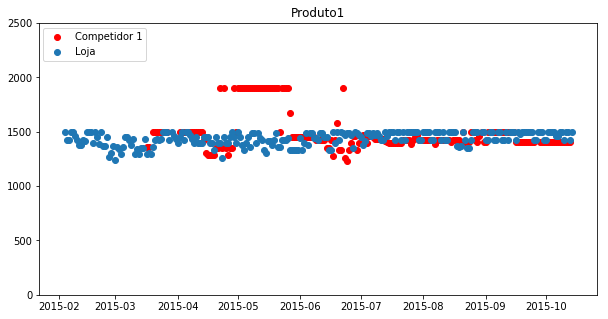

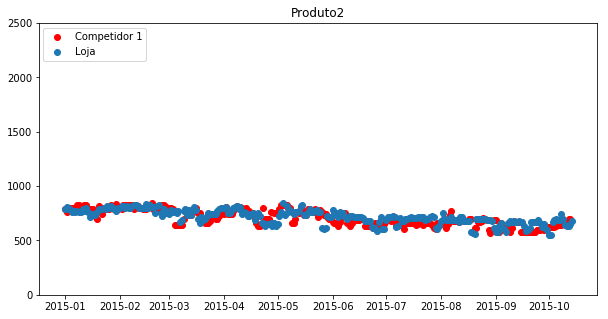

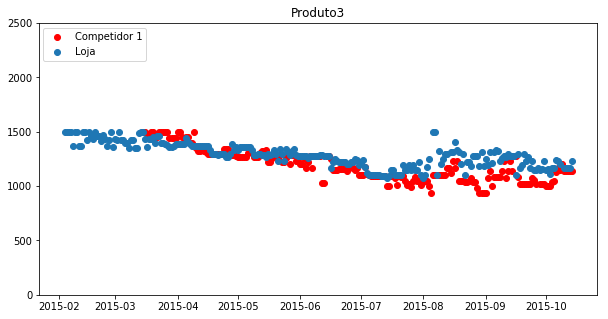

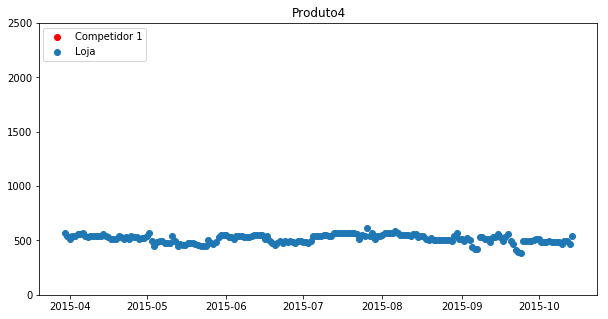

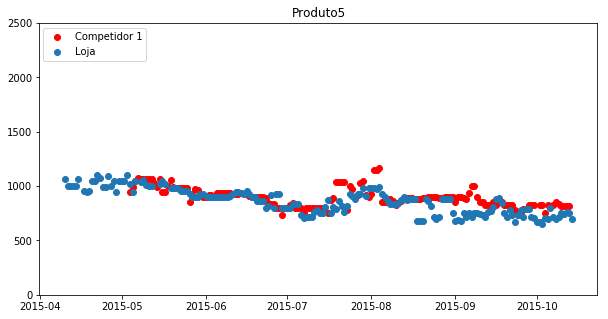

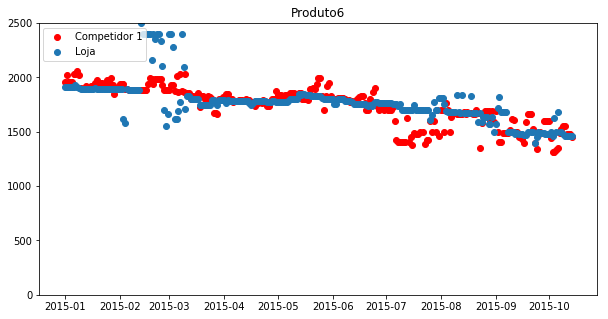

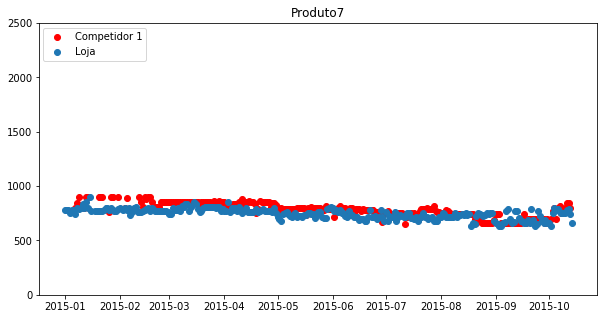

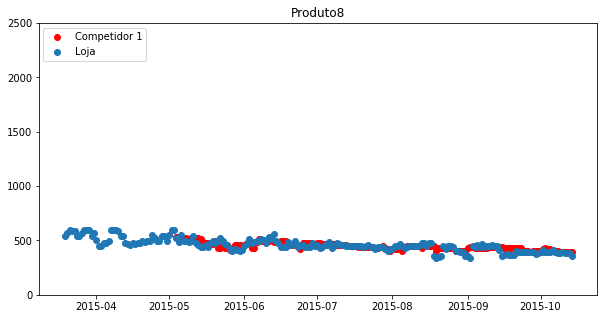

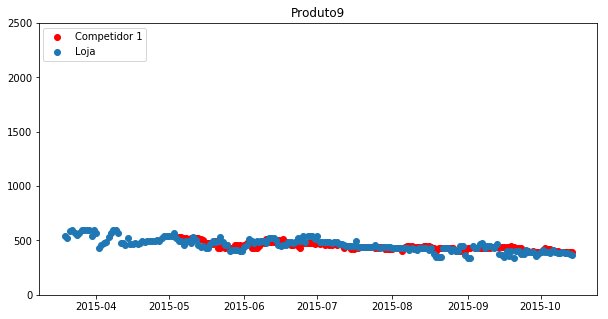

In [20]:
# COMPARANDO OS PREÇOS EM RELAÇÃO AO COMPETIDOR 1
for i in range(1,10):
    plt.figure(figsize=(10,5))
    plt.title('Produto' + str(i))
    plt.ylim(0, 2500)
    plt.plot(prices_median_per_day_por_product_por_competitor[1][0][i],'ro', label='Competidor 1')
    plt.plot(price_in_time_DATE_INDEX_MEDIAN[i], 'o', label = 'Loja')
    plt.legend(bbox_to_anchor=(0.006, 0.86), loc=3, borderaxespad=0.)
   


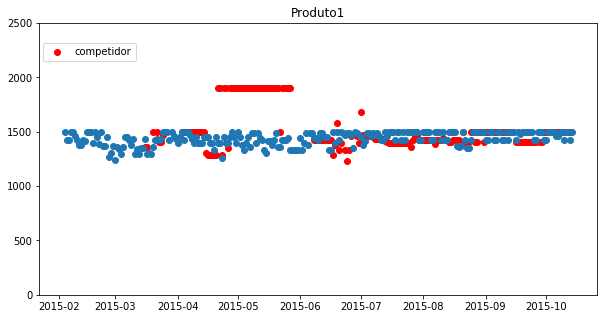

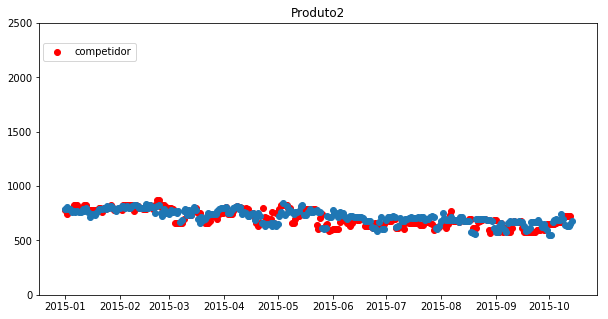

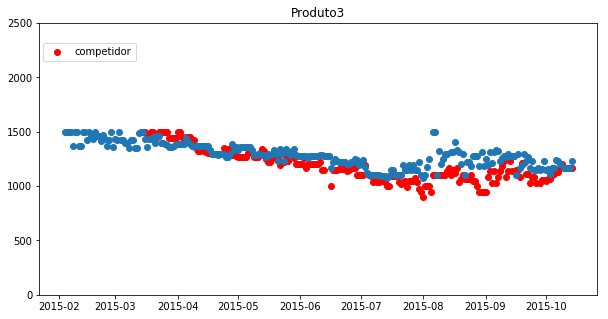

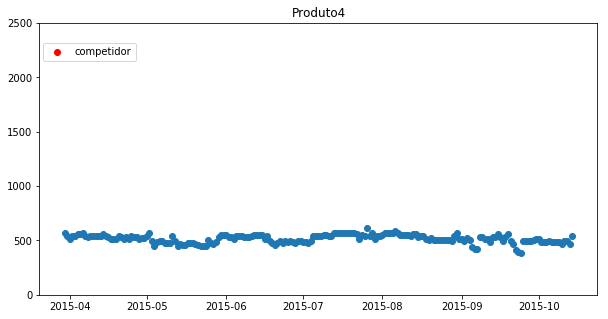

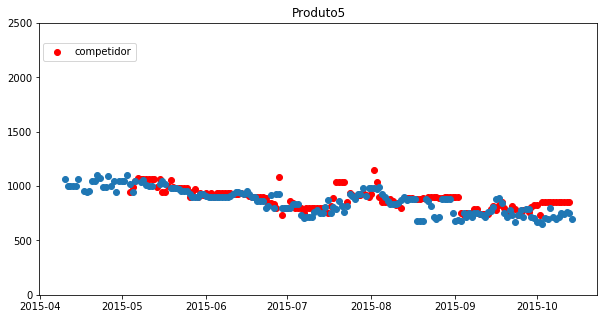

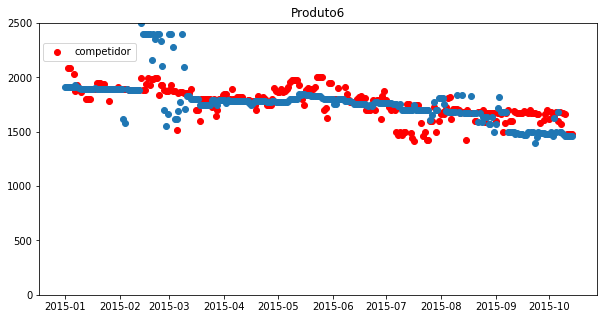

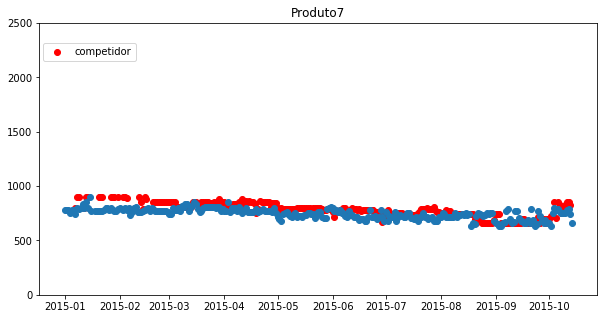

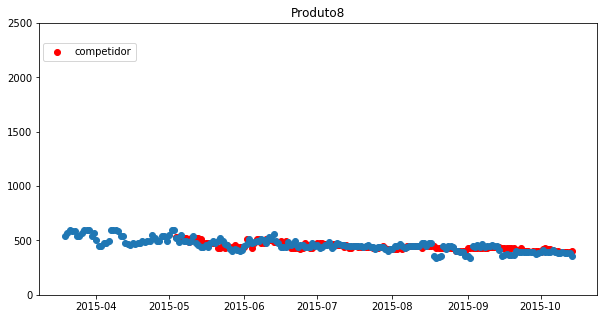

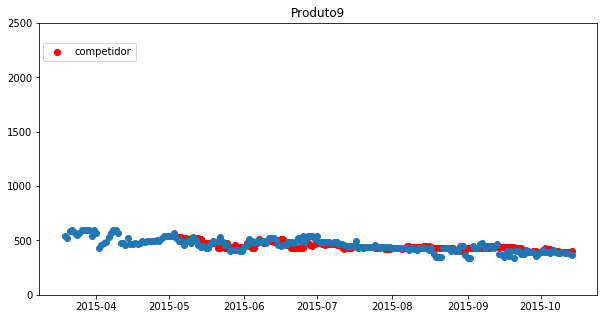

In [21]:
# COMPARANDO OS PREÇOS EM RELAÇÃO AO COMPETIDOR 2
for i in range(1,10):
    plt.figure(figsize=(10,5))
    plt.title('Produto' + str(i))
    plt.ylim(0, 2500)
    plt.plot(prices_median_per_day_por_product_por_competitor[2][0][i],'ro', label='competidor')
    plt.legend(bbox_to_anchor=(0.006, 0.86), loc=3, borderaxespad=0.)
    plt.plot(price_in_time_DATE_INDEX_MEDIAN[i], 'o')


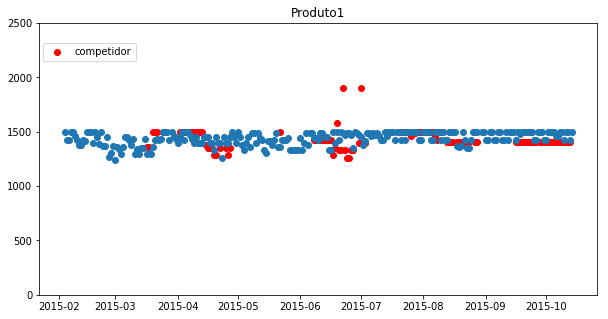

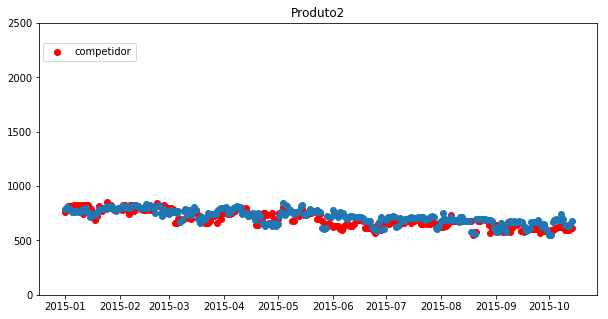

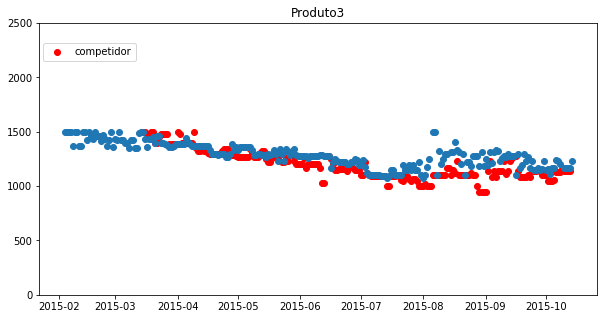

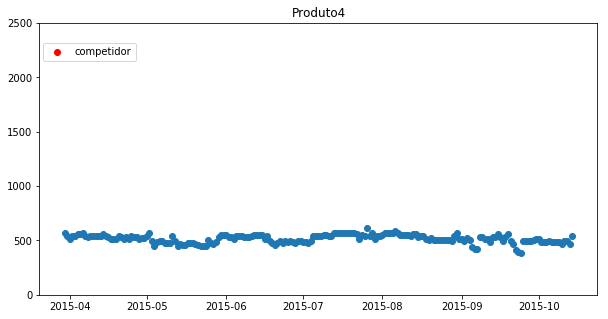

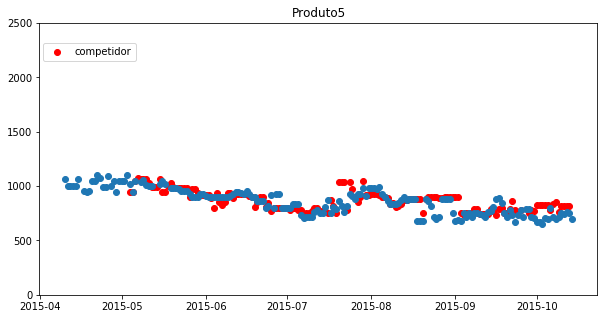

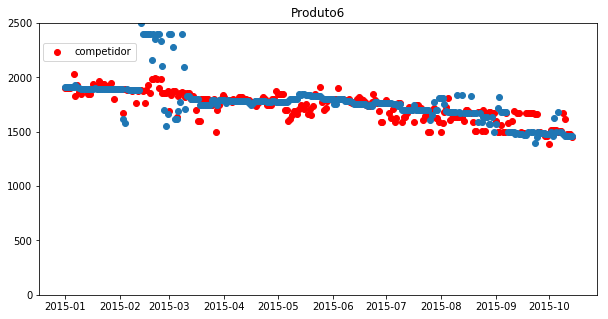

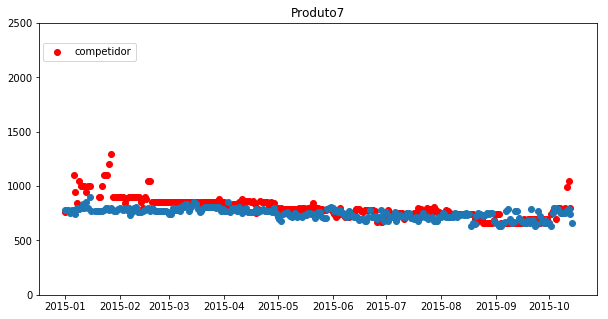

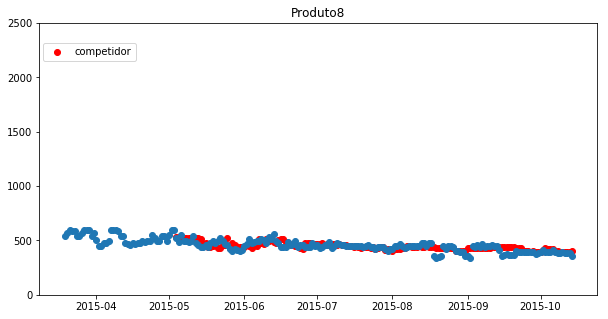

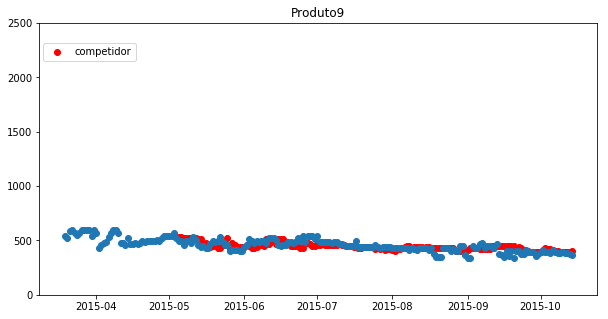

In [388]:
# COMPARANDO OS PREÇOS EM RELAÇÃO AO COMPETIDOR 3
for i in range(1,10):
    plt.figure(figsize=(10,5))
    plt.title('Produto' + str(i))
    plt.ylim(0, 2500)
    plt.plot(prices_median_per_day_por_product_por_competitor[3][0][i],'ro', label='competidor')
    plt.legend(bbox_to_anchor=(0.006, 0.86), loc=3, borderaxespad=0.)
    plt.plot(price_in_time_DATE_INDEX_MEDIAN[i], 'o')

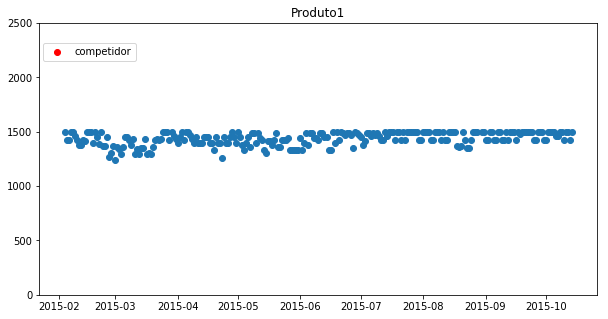

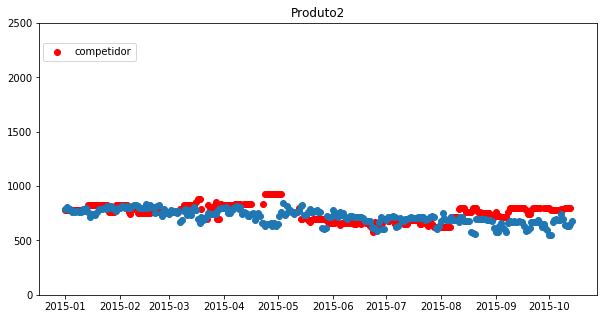

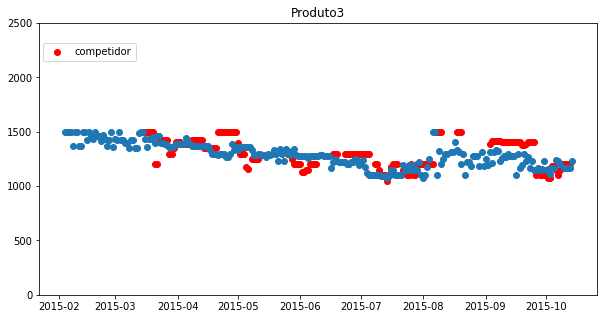

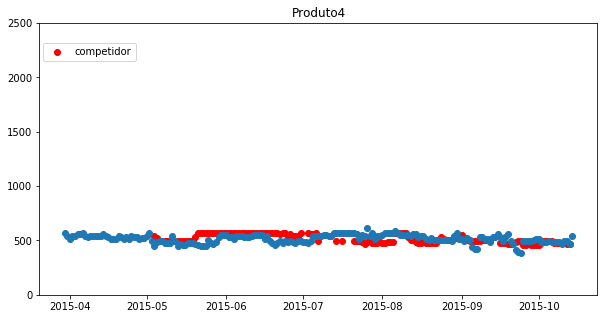

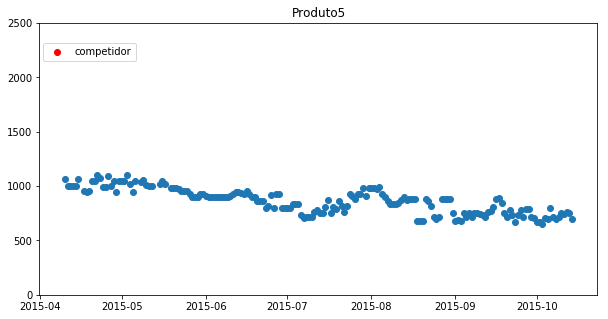

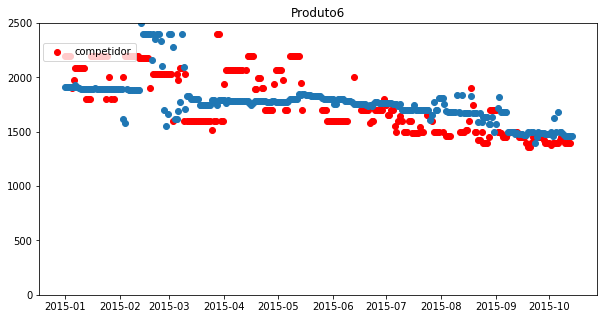

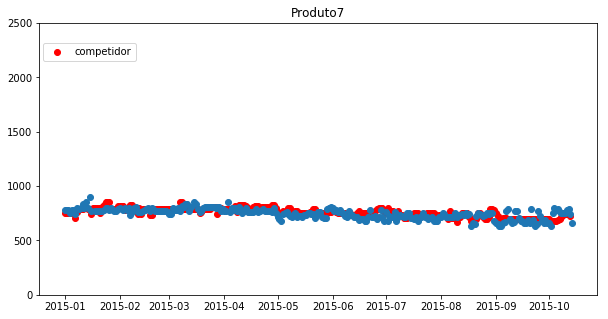

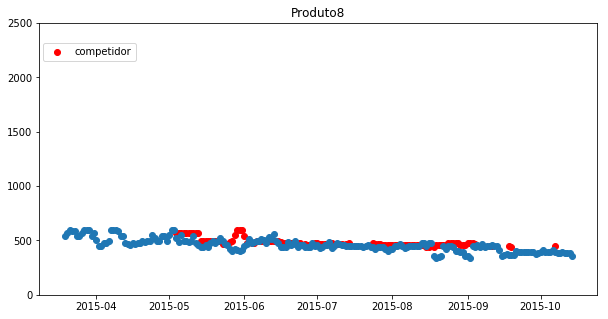

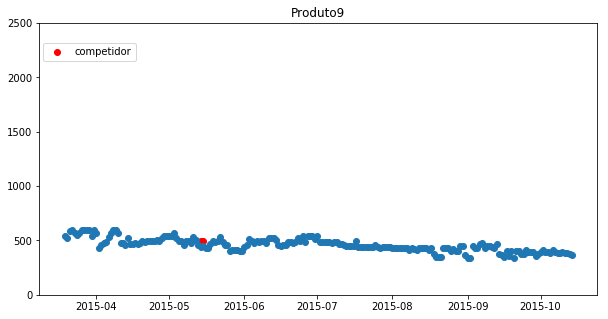

In [389]:
# COMPARANDO OS PREÇOS EM RELAÇÃO AO COMPETIDOR 4
for i in range(1,10):
    plt.figure(figsize=(10,5))
    plt.title('Produto' + str(i))
    plt.ylim(0, 2500)
    plt.plot(prices_median_per_day_por_product_por_competitor[4][0][i],'ro', label='competidor')
    plt.legend(bbox_to_anchor=(0.006, 0.86), loc=3, borderaxespad=0.)
    plt.plot(price_in_time_DATE_INDEX_MEDIAN[i], 'o')

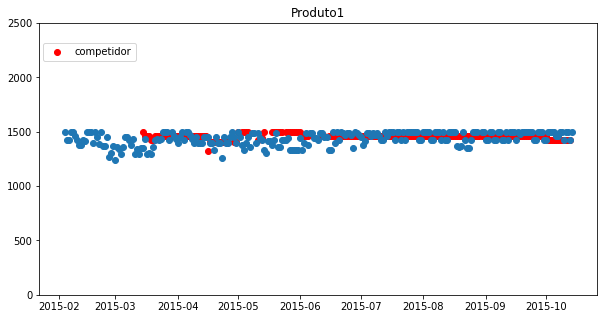

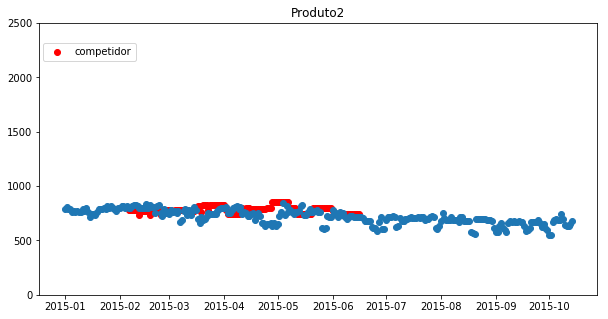

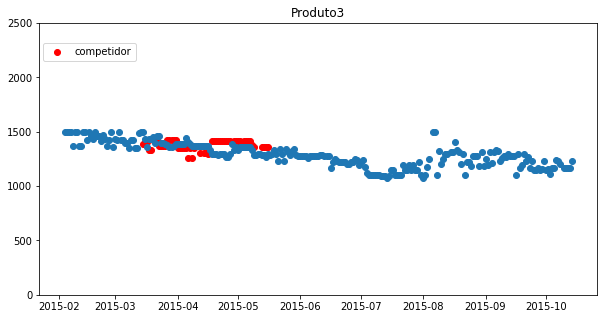

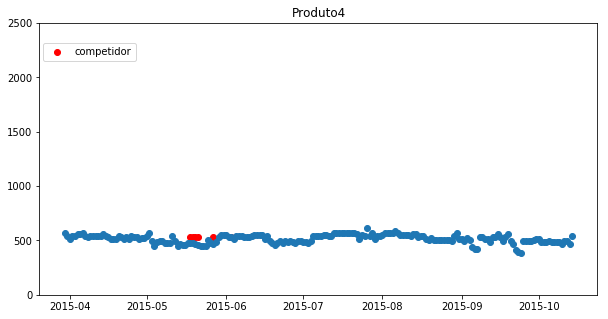

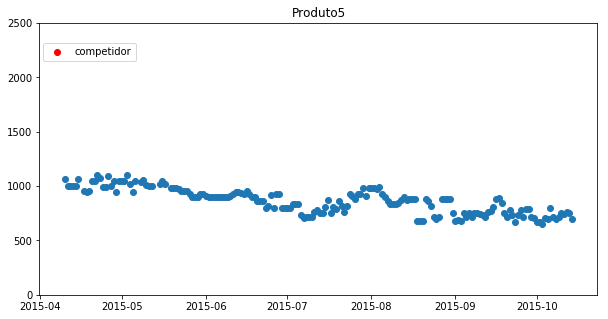

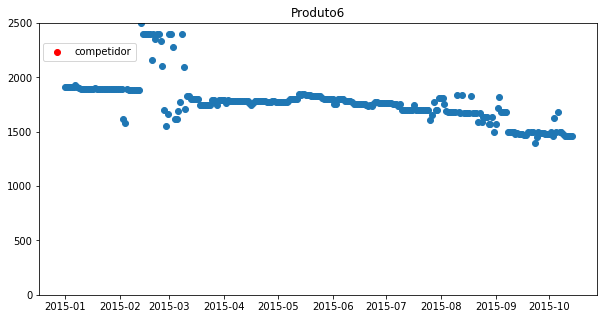

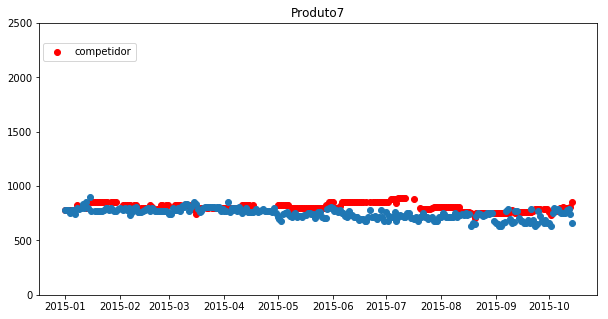

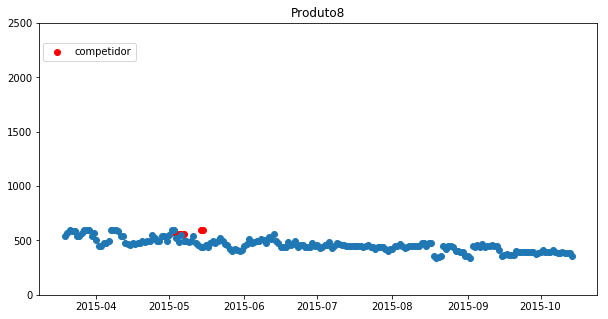

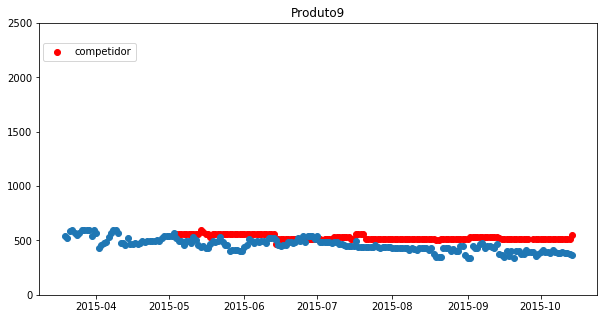

In [390]:
# COMPARANDO OS PREÇOS EM RELAÇÃO AO COMPETIDOR 5
for i in range(1,10):
    plt.figure(figsize=(10,5))
    plt.title('Produto' + str(i))
    plt.ylim(0, 2500)
    plt.plot(prices_median_per_day_por_product_por_competitor[5][0][i],'ro', label='competidor')
    plt.legend(bbox_to_anchor=(0.006, 0.86), loc=3, borderaxespad=0.)
    plt.plot(price_in_time_DATE_INDEX_MEDIAN[i], 'o')

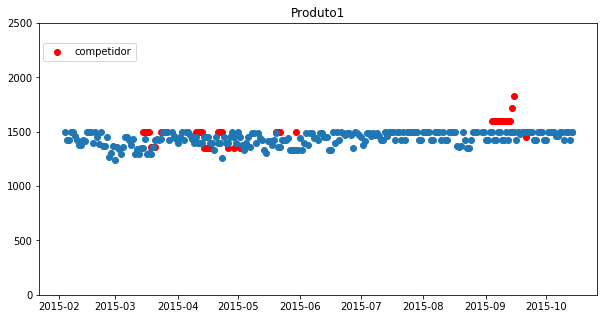

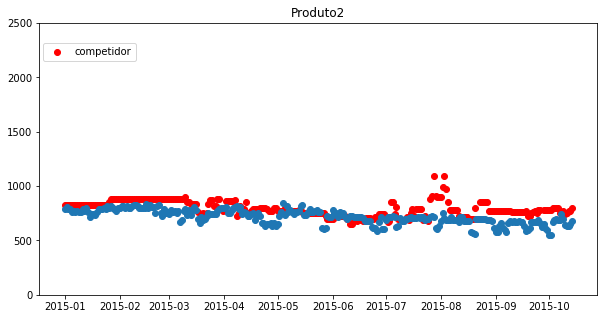

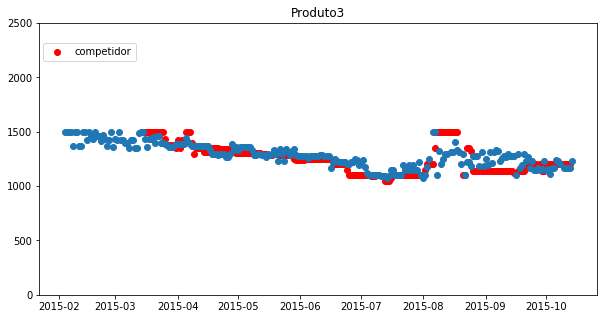

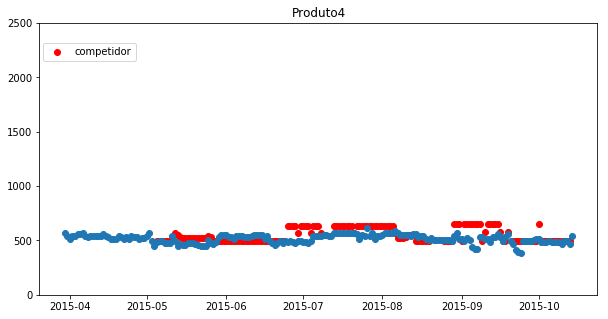

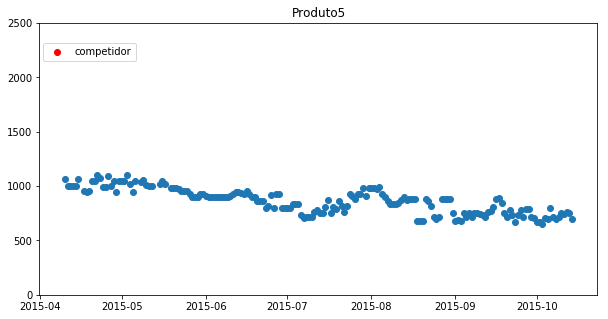

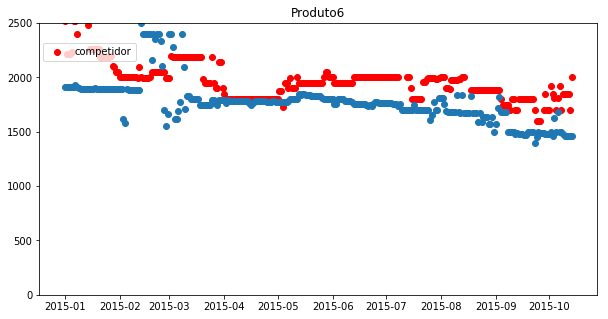

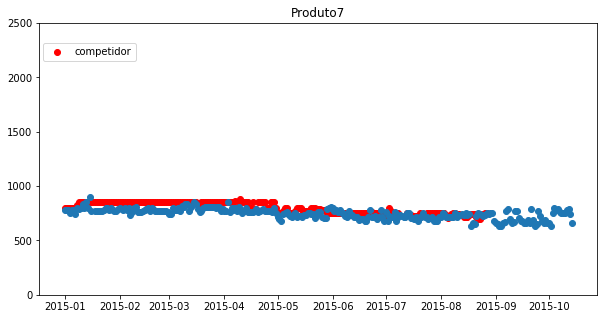

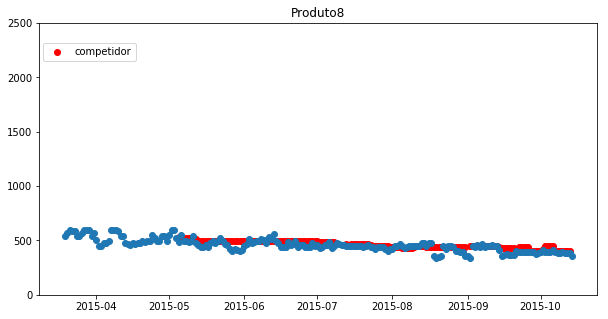

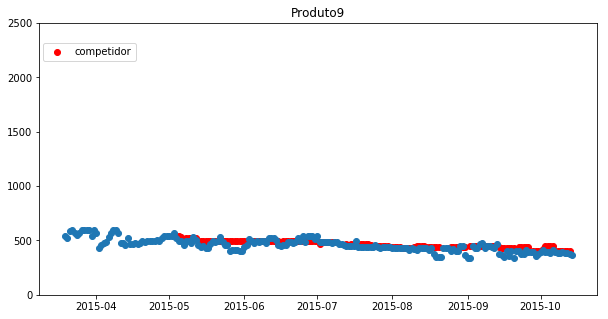

In [391]:
# COMPARANDO OS PREÇOS EM RELAÇÃO AO COMPETIDOR 6
for i in range(1,10):
    plt.figure(figsize=(10,5))
    plt.title('Produto' + str(i))
    plt.ylim(0, 2500)
    plt.plot(prices_median_per_day_por_product_por_competitor[6][0][i],'ro', label='competidor')
    plt.legend(bbox_to_anchor=(0.006, 0.86), loc=3, borderaxespad=0.)
    plt.plot(price_in_time_DATE_INDEX_MEDIAN[i], 'o')